In [1]:
from argoverse.map_representation.map_api import ArgoverseMap

from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

In [2]:
avm = ArgoverseMap()

In [3]:
train_loader = ArgoverseForecastingLoader('/home/akash/Desktop/argoverse/data/train/data')
val_loader = ArgoverseForecastingLoader('/home/akash/Desktop/argoverse/data/val/data/')
test_loader = ArgoverseForecastingLoader('/home/akash/Desktop/argoverse/data/test_obs/data/')

In [4]:
from argoverse.visualization.visualize_sequences import viz_sequence

### Time recorded between 2 consecutive movements of the AV 

In [5]:
train_loader[0].seq_df.iloc[9]['TIMESTAMP'] - train_loader[0].seq_df.iloc[0]['TIMESTAMP']

0.10917896032333374

In [6]:
train_loader[0].current_seq

PosixPath('/home/akash/Desktop/argoverse/data/train/data/203842.csv')

### Number of objects in the scene == Number of tracks 

In [22]:
train_loader[0].track_id_list

['00000000-0000-0000-0000-000000000000',
 '00000000-0000-0000-0000-000000079852',
 '00000000-0000-0000-0000-000000079937',
 '00000000-0000-0000-0000-000000079938',
 '00000000-0000-0000-0000-000000079941',
 '00000000-0000-0000-0000-000000079949',
 '00000000-0000-0000-0000-000000079950',
 '00000000-0000-0000-0000-000000079951',
 '00000000-0000-0000-0000-000000079952',
 '00000000-0000-0000-0000-000000079956',
 '00000000-0000-0000-0000-000000079957',
 '00000000-0000-0000-0000-000000079959',
 '00000000-0000-0000-0000-000000079960',
 '00000000-0000-0000-0000-000000079964',
 '00000000-0000-0000-0000-000000079965',
 '00000000-0000-0000-0000-000000079972',
 '00000000-0000-0000-0000-000000079973',
 '00000000-0000-0000-0000-000000079974',
 '00000000-0000-0000-0000-000000079980',
 '00000000-0000-0000-0000-000000079983',
 '00000000-0000-0000-0000-000000079988',
 '00000000-0000-0000-0000-000000079994']

In [115]:
len(train_loader[0].track_id_list)

22

### There should be 22 distinct objects in the scene

In [25]:
train_loader[0].seq_df

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME
0,3.159771e+08,00000000-0000-0000-0000-000000000000,AV,2954.674741,1670.619842,PIT
1,3.159771e+08,00000000-0000-0000-0000-000000079852,OTHERS,2914.995066,1634.465661,PIT
2,3.159771e+08,00000000-0000-0000-0000-000000079937,OTHERS,2973.331854,1652.991565,PIT
3,3.159771e+08,00000000-0000-0000-0000-000000079949,OTHERS,2940.079475,1691.356946,PIT
4,3.159771e+08,00000000-0000-0000-0000-000000079950,OTHERS,2990.158952,1634.114130,PIT
5,3.159771e+08,00000000-0000-0000-0000-000000079951,OTHERS,2996.891019,1638.432929,PIT
6,3.159771e+08,00000000-0000-0000-0000-000000079938,AGENT,2966.183864,1669.157324,PIT
7,3.159771e+08,00000000-0000-0000-0000-000000079941,OTHERS,2976.944036,1648.231911,PIT
8,3.159771e+08,00000000-0000-0000-0000-000000079952,OTHERS,2937.035147,1692.943097,PIT
9,3.159771e+08,00000000-0000-0000-0000-000000000000,AV,2955.386376,1671.313501,PIT


### Features to think about:
- Number of objects in the scene. Does that affect anything? - (Already calculated by compute_features.py)
- Complexity of the scene

In [8]:
len(train_loader[3].seq_df)

387

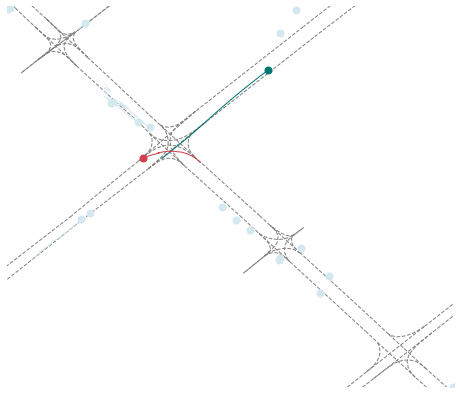

In [9]:
viz_sequence(train_loader[0].seq_df,show = True)

### Understanding candidate centerlines

In [97]:
seq_path='/home/akash/Desktop/argoverse/data/train/data/203842.csv'

In [98]:
avm = ArgoverseMap()

In [99]:
help(avm)

Help on ArgoverseMap in module argoverse.map_representation.map_api object:

class ArgoverseMap(builtins.object)
 |  ArgoverseMap() -> None
 |  
 |  This class provides the interface to our vector maps and rasterized maps. Exact lane boundaries
 |  are not provided, but can be hallucinated if one considers an average lane width.
 |  
 |  Methods defined here:
 |  
 |  __init__(self) -> None
 |      Initialize the Argoverse Map.
 |  
 |  append_height_to_2d_city_pt_cloud(self, pt_cloud_xy: numpy.ndarray, city_name: str) -> numpy.ndarray
 |      Accept 2d point cloud in xy plane and return 3d point cloud (xyz)
 |      
 |      Args:
 |          pt_cloud_xy: Numpy array of shape (N,2)
 |          city_name: either 'MIA' for Miami or 'PIT' for Pittsburgh
 |      
 |      Returns:
 |          pt_cloud_xyz: Numpy array of shape (N,3)
 |  
 |  build_centerline_index(self) -> Mapping[str, Mapping[int, argoverse.map_representation.lane_segment.LaneSegment]]
 |      Build dictionary of centerlin

In [100]:
# First 20 are 2 seconds
train_loader.get(seq_path).agent_traj[:20]

array([[2966.18386427, 1669.15732392],
       [2965.92673763, 1669.43001372],
       [2965.70535641, 1669.69927423],
       [2965.40887023, 1669.96463113],
       [2965.28302529, 1670.16182668],
       [2965.11330823, 1670.30196368],
       [2964.90024931, 1670.46691469],
       [2964.66640656, 1670.67009824],
       [2964.50485953, 1670.89559358],
       [2964.41388441, 1670.95932678],
       [2964.25605641, 1671.04190526],
       [2964.07916364, 1671.09028855],
       [2963.88388563, 1671.19040391],
       [2963.72128951, 1671.45065129],
       [2963.5629334 , 1671.52180103],
       [2963.33833392, 1671.62109549],
       [2963.233091  , 1671.71093708],
       [2962.98773977, 1671.82052661],
       [2962.72922177, 1671.94877691],
       [2962.45708413, 1672.09955038]])

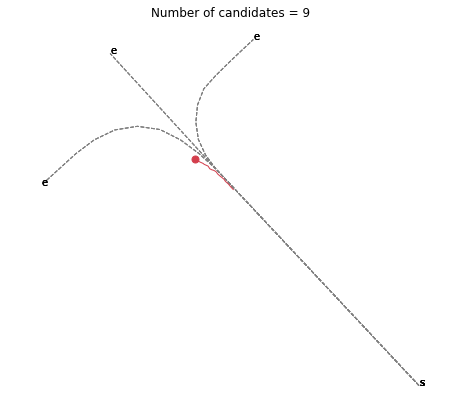

In [101]:
agent_obs_traj = train_loader.get(seq_path).agent_traj[:20]
cands = avm.get_candidate_centerlines_for_traj(agent_obs_traj, train_loader.get(seq_path).city, viz=True)

In [110]:
agent_obs_traj

array([[2966.18386427, 1669.15732392],
       [2965.92673763, 1669.43001372],
       [2965.70535641, 1669.69927423],
       [2965.40887023, 1669.96463113],
       [2965.28302529, 1670.16182668],
       [2965.11330823, 1670.30196368],
       [2964.90024931, 1670.46691469],
       [2964.66640656, 1670.67009824],
       [2964.50485953, 1670.89559358],
       [2964.41388441, 1670.95932678],
       [2964.25605641, 1671.04190526],
       [2964.07916364, 1671.09028855],
       [2963.88388563, 1671.19040391],
       [2963.72128951, 1671.45065129],
       [2963.5629334 , 1671.52180103],
       [2963.33833392, 1671.62109549],
       [2963.233091  , 1671.71093708],
       [2962.98773977, 1671.82052661],
       [2962.72922177, 1671.94877691],
       [2962.45708413, 1672.09955038]])

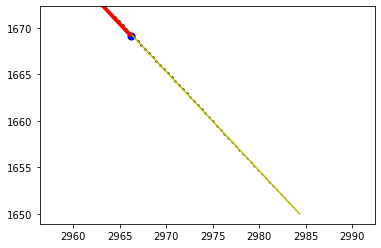

(array([-0.40497117,  0.43198209]), 0.9416197428091005)

In [103]:
### Fig size too small
avm.get_lane_direction(agent_obs_traj[0], train_loader.get(seq_path).city, visualize=True)

### Trying to find if ORACLE means AV. Here Agent seems to be the candidate

In [104]:
df = train_loader.get(seq_path).seq_df
oracle_track = df.loc[df['OBJECT_TYPE'] == 'AV'][['X','Y']].to_numpy()[:20]

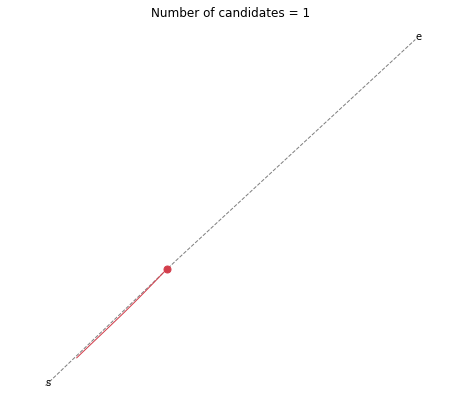

In [105]:
oracle_cands = avm.get_candidate_centerlines_for_traj(oracle_track, train_loader.get(seq_path).city, viz=True)

In [106]:
oracle_cands[0]

array([[2950.39882316, 1666.83194517],
       [2952.37045687, 1668.71877936],
       [2954.34209058, 1670.60561356],
       [2956.31372429, 1672.49244775],
       [2958.28535799, 1674.37928194],
       [2960.2569917 , 1676.26611613],
       [2962.22862541, 1678.15295032],
       [2964.20025912, 1680.03978451],
       [2966.17049493, 1681.92813826],
       [2968.13858347, 1683.81882614],
       [2968.13858347, 1683.81882614],
       [2971.79032624, 1687.1915972 ],
       [2975.44206901, 1690.56436826],
       [2979.09381178, 1693.93713932],
       [2982.74555455, 1697.30991038],
       [2986.39729731, 1700.68268144],
       [2990.04904008, 1704.0554525 ],
       [2993.70078285, 1707.42822356],
       [2997.35252562, 1710.80099463],
       [3001.00426839, 1714.17376569]])

### From the graph it seems that the centerlines are paths from the map that the vehicle <I>CAN FOLLOW</I>
### ORACLE does not seem to be the AV, as I cross verified for the same distance below.

In [10]:
# More segments than declared on the website. Website declares 
len(train_loader) + len(val_loader) + len(test_loader)

327790

### Website seems to be out of date. But the argoverse API github describes the data correctly.

In [13]:
import pickle

with open('data/forecasting_features_val.pkl', 'rb') as f:
    val_data = pickle.load(f)
    
with open('data/forecasting_features_train.pkl', 'rb') as f:
    train_data = pickle.load(f)
    
with open('data/forecasting_features_test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [14]:
train_data

,SEQUENCE,FEATURES,CANDIDATE_CENTERLINES,ORACLE_CENTERLINE,CANDIDATE_NT_DISTANCES
0,112205,"[[315968165.16109926, 00000000-0000-0000-0000-...","[[[None, None], [None, None], [None, None], [N...","[[2548.833069629385, 1218.5448103477247], [254...","[[[None, None], [None, None], [None, None], [N..."
1,156577,"[[315970257.8937413, 00000000-0000-0000-0000-0...","[[[None, None], [None, None], [None, None], [N...","[[4121.654576845816, 2277.687776414212], [4115...","[[[None, None], [None, None], [None, None], [N..."
2,18628,"[[315969724.25395405, 00000000-0000-0000-0000-...","[[[None, None], [None, None], [None, None], [N...","[[526.4845540883834, 3403.7967230563518], [526...","[[[None, None], [None, None], [None, None], [N..."
3,143933,"[[315968838.15479857, 00000000-0000-0000-0000-...","[[[None, None], [None, None], [None, None], [N...","[[397.872915330634, 3373.053042180836], [400.2...","[[[None, None], [None, None], [None, None], [N..."
4,38519,"[[315997883.1877943, 00000000-0000-0000-0000-0...","[[[None, None], [None, None], [None, None], [N...","[[2788.0674013532116, 1260.0651254267432], [27...","[[[None, None], [None, None], [None, None], [N..."
5,202873,"[[315971208.9594823, 00000000-0000-0000-0000-0...","[[[None, None], [None, None], [None, None], [N...","[[273.8687947346151, 3330.0], [273.04486157638...","[[[None, None], [None, None], [None, None], [N..."
6,1526,"[[315994191.48134017, 00000000-0000-0000-0000-...","[[[None, None], [None, None], [None, None], [N...","[[694.575019010168, 1974.147199859377], [695.9...","[[[None, None], [None, None], [None, None], [N..."
7,24113,"[[315973490.8606847, 00000000-0000-0000-0000-0...","[[[None, None], [None, None], [None, None], [N...","[[2690.2584019128462, 1170.0], [2692.541684790...","[[[None, None], [None, None], [None, None], [N..."
8,145135,"[[315981525.88845, 00000000-0000-0000-0000-000...","[[[None, None], [None, None], [None, None], [N...","[[720.0, 2111.7544687712625], [721.20371648420...","[[[None, None], [None, None], [None, None], [N..."
9,188693,"[[315974007.4960902, 00000000-0000-0000-0000-0...","[[[None, None], [None, None], [None, None], [N...","[[2752.571699127369, 1350.0], [2749.6214659132...","[[[None, None], [None, None], [None, None], [N..."


In [108]:
train_data.loc[train_data.SEQUENCE == 203842]['FEATURES'].to_list()[0][0]

array(['315977144.86406106', '00000000-0000-0000-0000-000000079938',
       'AGENT', 2966.1838642662474, 1669.1573239193247, 'PIT',
       34.26751209803597, 43.438667059805276, 5.0, 0.13743127044862072,
       147.17362660360791], dtype=object)

### Extra features are as follows

- Min distance to objects in the front
- Min distance to objects in the back 
- Number of neighbors at that instant
- Distance along lane centerline
- Offset from lane centerline

In [114]:
# Strange to see no centerlines
train_data.loc[train_data.SEQUENCE == 203842]['ORACLE_CENTERLINE'].to_list()

[array([[3045.26345523, 1560.13846842],
        [3045.9134723 , 1560.69899781],
        [3046.56348936, 1561.2595272 ],
        [3047.21350642, 1561.82005659],
        [3047.86352348, 1562.38058598],
        [3048.51354054, 1562.94111537],
        [3049.15948406, 1563.50622041],
        [3049.80444306, 1564.07243133],
        [3050.44940205, 1564.63864224],
        [3051.09436105, 1565.20485316],
        [3051.09436105, 1565.20485316],
        [3052.11617001, 1566.2742085 ],
        [3053.05116391, 1567.4006827 ],
        [3053.75935374, 1568.68440646],
        [3054.2208695 , 1570.08296754],
        [3054.41920516, 1571.54423864],
        [3054.39168946, 1573.01774573],
        [3053.90865061, 1574.39363603],
        [3053.11247587, 1575.61732165],
        [3052.14273398, 1576.72937081],
        [3052.14273398, 1576.72937081],
        [3051.65947173, 1577.26734594],
        [3051.17620949, 1577.80532107],
        [3050.69294724, 1578.3432962 ],
        [3050.20968499, 1578.88127133],


In [70]:
test_data.FEATURES.iloc[0].shape

(50, 11)

### We now have 11 features

In [19]:
test_data.FEATURES.iloc[0][0].shape

(11,)

In [ ]:
# Weighted Knn
# LSTM